<h3>우편번호 손글씨 인식하기</h3>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

mpl.rc('figure', figsize=(8,5))
mpl.rc('figure', dpi=300)

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0,y_train0),(X_test0,y_test0) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [3]:
X_train = X_train0[:,:,:,np.newaxis].astype('float32')/255.0
X_test = X_test0[:,:,:,np.newaxis].astype('float32')/255.0

<h3>Feature Scaling</h3>
overfitting 방지 및 Cost 함수의 빠른 수렴을 위해서 0~255 범위를 0-1범위로 Scaling

In [4]:
# MNIST 예제는 0~9 숫자
# 10가지의 Category를 가지고 있다.
Y_train = np_utils.to_categorical(y_train0,10)
Y_test = np_utils.to_categorical(y_test0,10)

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

In [7]:
model1 = Sequential()

In [ ]:
# Conv2D : 필터를 이용하여 영상 특징을 추출한다.
# activation : 활성함수를 지정

# kernel_initializer : glorot_uniform
# 입력값과 출력 값 사이의 난수를 선택해서 입력값의 제곱근으로 나눈다.
# Xavier Glorot(과학자) : 
# Yoshua Bengio(과학자) : 2010년

In [10]:
model1.add(Conv2D(8,(5,5), activation='relu', input_shape=(28,28,1), kernel_initializer="glorot_uniform")) 

In [ ]:
# MaxPooling2D : 영상에서 사소한 변화가 특징 추출에 크게 연향을 미치지 않도록 해준다.
#                강한것만 남기고 약한 변화는 줄이는 효과

In [11]:
model1.add(MaxPooling2D())

In [ ]:
# Flatten : 2차원의 특징맵을 전결합층으로 전달하기 위해서 1차원 형식으로 바꿔준다.

In [12]:
model1.add(Flatten())

In [ ]:
# Dense : fully Connected layer

In [13]:
model1.add(Dense(10, activation="softmax", kernel_initializer="glorot_uniform")) # output: 10개

In [ ]:
# softmax: 활성함수, 값의 분포를 활률 분포로 바꿔주는 함수
# 0.0012 0.00111 0.9870 0.0240
# 0      0       1      0

In [14]:
np.random.seed(777)

In [ ]:
# Cross entropy는 두개의 확률분포 간의 거리(차이)를 의미
# 확률분포가 비슷하면 값이 작고 확률분포값이 다르면 값이 크다.

In [15]:
model1.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=Adadelta())

In [17]:
# learning
%%time 
# %%time : 시간 측정
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.7387 - acc: 0.7901 - val_loss: 0.3283 - val_acc: 0.9058
Epoch 2/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.3049 - acc: 0.9115 - val_loss: 0.2426 - val_acc: 0.9318
Epoch 3/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.2333 - acc: 0.9341 - val_loss: 0.2037 - val_acc: 0.9403
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1869 - acc: 0.9467 - val_loss: 0.1598 - val_acc: 0.9545
Epoch 5/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1543 - acc: 0.9566 - val_loss: 0.1270 - val_acc: 0.9629
Epoch 6/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1300 - acc: 0.9636 - val_loss: 0.1081 - val_acc: 0.9713
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1135 - acc: 0.9686 - val_loss: 0.

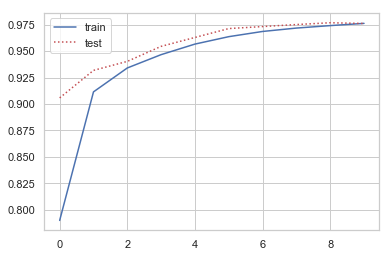

In [20]:
plt.plot(hist1.history['acc'], 'b-', label="train")
plt.plot(hist1.history['val_acc'], 'r:', label="test") # validation accuracy
plt.legend()
plt.show()

In [21]:
model1.save("mnist_cnn.model")

In [22]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 76CD-579A

 C:\Users\acorn\OneDrive\jupyter_workspace 디렉터리

2018-11-15  오전 11:16    <DIR>          .
2018-11-15  오전 11:16    <DIR>          ..
2018-11-15  오전 09:50    <DIR>          .ipynb_checkpoints
2018-11-14  오후 12:21           539,885 day1.ipynb
2018-10-25  오후 06:15           101,231 day2.ipynb
2018-10-26  오후 06:12            67,228 day3.ipynb
2018-10-29  오후 06:21           279,545 day4.ipynb
2018-10-31  오후 01:10               102 dept.csv
2018-11-12  오후 12:07    <DIR>          img
2018-11-01  오전 11:41             4,177 iris.csv
2018-11-12  오후 04:25                80 jsonTest.txt
2018-10-24  오후 04:09               262 korea.txt
2018-11-15  오전 09:55             6,496 ML_CNN_base.ipynb
2018-11-13  오후 01:04             7,394 ML_MLP.ipynb
2018-11-13  오전 10:53           214,908 ML01.ipynb
2018-11-13  오전 10:53           517,842 ML02.ipynb
2018-11-13  오전 11:19            89,664 ML03.ipynb
2018-11-13  오전 11:45            64,687 ML04.ipynb
2018-11-13  오후 

In [23]:
l1 = model1.layers[0] # layer 1번

In [24]:
w1,b1 = l1.get_weights() # layer 1번에서의 가중치와 절편

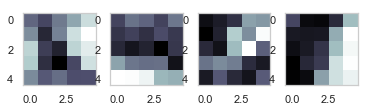

In [26]:
# 함수 실행 과정 중 실제로 가중치가 변화하고 있는지 보기위해 한번 띄어봄
M = 4
for i in range(M):
    plt.subplot(1,M,i+1)
    plt.imshow(w1[:,:,0,i], cmap=mpl.cm.bone_r)
    plt.grid(False)

<h3>시각화 함수</h3>

In [47]:
def visualize1(x_test):
    model1_test1 = Sequential()
    model1_test1.add(Conv2D(8, (5, 5), activation='linear', input_shape=(28, 28, 1), weights=(w1, b1)))
    model1_test2 = Sequential()
    model1_test2.add(Conv2D(8, (5, 5), activation='relu', input_shape=(28, 28, 1), weights=(w1, b1)))
    model1_test2.add(MaxPooling2D())
    a_test = model1_test1.predict(x_test)
    z_test = model1_test2.predict(x_test)
    
    plt.figure(figsize=(10, 6))
    M = 4 # train 단계
    for i in range(M + 1):
        if i == 0:
            plt.subplot(3, M + 1, i + 1) # 뽑은 데이터 x_test
            plt.imshow(x_test[0, :, :, i], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.subplot(3, M + 1, i + 1) # 가중치 감안해서 그린것
            plt.imshow(w1[:, :, 0, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            
            plt.subplot(3, M + 1, i + 1 + M + 1) # linear 활성함수 적용한 것 
            plt.imshow(a_test[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            
            plt.subplot(3, M + 1, i + 1 + 2 * M + 2) # relu 활성합수 적용한 것
            plt.imshow(z_test[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.tight_layout()
    plt.show()

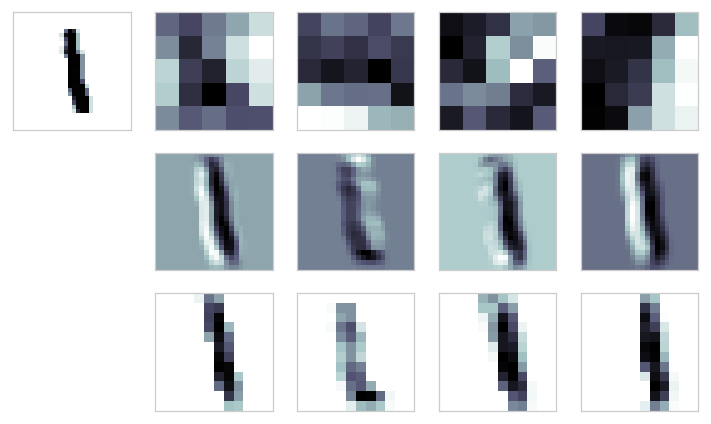

In [48]:
i = 6
visualize1(X_train[i:i+1])

In [49]:
model2 = Sequential()
# filter 2번 처리하고 결과 보기
model2.add(Conv2D(8,(5,5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Conv2D(8,(5,5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation="softmax", kernel_initializer="glorot_uniform"))

In [51]:
model2.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=Adadelta())

In [52]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.8612 - acc: 0.7363 - val_loss: 0.2504 - val_acc: 0.9274
Epoch 2/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.2227 - acc: 0.9343 - val_loss: 0.1597 - val_acc: 0.9527
Epoch 3/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.1642 - acc: 0.9520 - val_loss: 0.1266 - val_acc: 0.9615
Epoch 4/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.1392 - acc: 0.9592 - val_loss: 0.1151 - val_acc: 0.9644
Epoch 5/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.1236 - acc: 0.9637 - val_loss: 0.0994 - val_acc: 0.9692
Epoch 6/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.1115 - acc: 0.9673 - val_loss: 0.1038 - val_acc: 0.9654
Epoch 7/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.1039 - acc: 0.9691 - val_loss: 0.

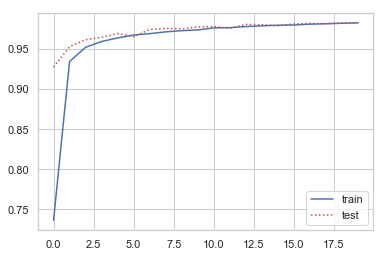

In [54]:
plt.plot(hist2.history['acc'], 'b-', label="train")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()